In [1]:
import sys
sys.path.append("./planet-wind-rt/")

import argparse
from planet_wind_constants import cs1,cs2,nu1,nu2,nu3,c,natural_gamma
from scipy.special import wofz
import time
from scipy.optimize import newton
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.interpolate import RegularGridInterpolator
import planet_wind_utils_v6 as pw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import deepdish as dd
import seaborn as sns
from astropy.io import ascii
#mpl.use('Agg')

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

Omega_orb = 1.28241e-05
a = 8.228e+11
rp = 6.72e9

Constants defined...


In [2]:
SCALE = 0.25

# Convergence Studies, Appendix

In [3]:
def plot_list(filelist,labellist,pal,offset=0.0,legtitle=None,labely=True,labelx=True):
    for i,fn in enumerate(filelist):
        sp = ascii.read(fn,names=['lambda','flux'])
        plt.plot(sp['lambda'],sp['flux']+offset*i,label=labellist[i],color=pal[i],lw=2)

    plt.legend(loc='lower left',frameon=True,title=legtitle)
    plt.axvline(10830.33977, color='black', ls=':')
    plt.axvline(10830.2501, color='black', ls=':')
    plt.axvline(10829.09114, color='black', ls=':')
    if labelx:
        plt.xlabel(r'wavelength [$\AA$]')
    if labely:
        plt.ylabel('relative flux')
        
def plot_list_planetframe(filelist,labellist,pal,alist,offset=0.0):
    vorb = np.sqrt( (6.67e-8*orb['m1'][0])/orb['sep'][0] )
    vplanet = np.sin(np.array(alist))*vorb
    for i,fn in enumerate(filelist):
        sp = ascii.read(fn,names=['lambda','flux'])
        plt.axhline(1+offset*i,color=pal[i],lw=2,ls=':',zorder=0)
        plt.plot(sp['lambda']*(1+vplanet[i]/c.c),sp['flux']+offset*i,label=labellist[i],color=pal[i],lw=2)

    aa = np.linspace(-0.3,0.3,1000)
    
    plt.axvline(10830.33977, color='black', ls=':')
    plt.axvline(10830.2501, color='black', ls=':')
    plt.axvline(10829.09114, color='black', ls=':')
    plt.xlabel(r'planet-frame wavelength [$\AA$]')
    plt.xlim(10828,10831.5)

reading orbit file for planet wind simulation...


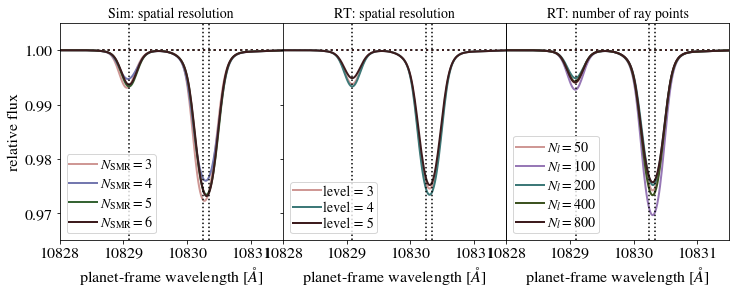

In [13]:
orb = pw.read_trackfile("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/pm_trackfile.dat")

plt.figure(figsize=(12,4))

# N SMR
plt.subplot(131)
filelist = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A3/PW_W107.out1.00030.athdf_s0.25_l3_Nmc3000_Nr200_spectrum23_a0.06.txt",
            "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A4/PW_W107.out1.00030.athdf_s0.25_l4_Nmc3000_Nr200_spectrum23_a0.06.txt",
            "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l4_Nmc3000_Nr200_spectrum23_a0.06.txt",
            "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A6/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.06.txt"]
    
    
labellist = [r"$N_{\rm SMR} = 3$",r"$N_{\rm SMR} = 4$",r"$N_{\rm SMR} = 5$",r"$N_{\rm SMR} = 6$"]

#pal = sns.cubehelix_palette(len(filelist),light=0.66,rot=1,reverse=False)
pal = sns.cubehelix_palette(len(filelist),light=0.66,rot=2,reverse=False)

plt.title("Sim: spatial resolution",fontsize=14)
plot_list_planetframe(filelist,labellist,pal,[0.06,0.06,0.06,0.06])
plt.ylim(0.965,1.005)
plt.xlim(10828,10831.5)
plt.legend()
plt.ylabel("relative flux")


#Nl
plt.subplot(133)
filelist = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr50_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr100_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr400_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr800_spectrum23_a0.06.txt"]

labellist = [r"$N_l = 50$",
           r"$N_l = 100$",
            r"$N_l = 200$",
            r"$N_l = 400$",
            r"$N_l = 800$"]

pal = sns.cubehelix_palette(len(filelist),light=0.66,rot=2,reverse=False)


plt.title("RT: number of ray points",fontsize=14)
plot_list_planetframe(filelist,labellist,pal,[0.06,0.06,0.06,0.06,0.06])
plt.ylim(0.965,1.005)
plt.xlim(10828,10831.5)
plt.yticks(visible=False)
plt.legend()


# rt level
plt.subplot(132)
filelist = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l3_Nmc3000_Nr200_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l4_Nmc3000_Nr200_spectrum23_a0.06.txt",
           "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.06.txt"]

labellist = [r"level = 3",r"level = 4",r"level = 5"]

pal = sns.cubehelix_palette(len(filelist),light=0.66,rot=2,reverse=False)


plt.title("RT: spatial resolution",fontsize=14)
plot_list_planetframe(filelist,labellist,pal,[0.06,0.06,0.06])
plt.ylim(0.965,1.005)
plt.xlim(10828,10831.5)
plt.yticks(visible=False)
plt.legend()

plt.subplots_adjust(wspace=0)
plt.savefig("figures/convergence_combined.pdf",bbox_inches='tight')

In [415]:
0.06/(2*np.pi)

0.00954929658551372

# Full-Frame Snapshot

In [526]:
def sliceplotinset():
    fig,ax = plt.subplots(figsize=(7,6))

    lim=2e12
    plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,
               pw.get_plot_array_midplane(d['y'][:,0,:])/c.au,
               pw.get_plot_array_midplane(np.log10(d['rho'][:,0,:])),
               cmap='magma',vmin=-22,vmax=-16,shading='nearest',rasterized=True)


    cb = plt.colorbar(aspect=30,pad=0.02,label=r'$\log_{10}\left(\rho \right) \ \ [{\rm g \ cm}^{-3}]$',shrink=0.9,extend='both')
    cb.solids.set_edgecolor("face")

    plt.axis('equal')
    plt.xlim(-lim/c.au,lim/c.au)
    plt.ylim(-lim/c.au,lim/c.au)


    axins = ax.inset_axes([0.01, 0.01, 0.34, 0.34])
    axins.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,
                 pw.get_plot_array_midplane(d['y'][:,0,:])/c.au,
                 pw.get_plot_array_midplane(np.log10(d['rho'][:,0,:])),
                 cmap='magma',vmin=-22,vmax=-16,shading='nearest',rasterized=True)
    # sub region of the original image
    ilim = 1.5e11
    axins.set_aspect('equal')
    axins.set_xlim((-ilim-a)/c.au, (ilim-a)/c.au)
    axins.set_ylim(-ilim/c.au, ilim/c.au)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    ax.indicate_inset_zoom(axins)


    plt.xlabel(r'$x \ \ [\rm {au}]$')
    plt.ylabel(r'$y \ \ [\rm {au}]$')

reading orbit file for planet wind simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...


<ipython-input-527-ddc605c61dd8>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[i].pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,
<ipython-input-527-ddc605c61dd8>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axins.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,


reading orbit file for planet wind simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
reading orbit file for planet wind simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...


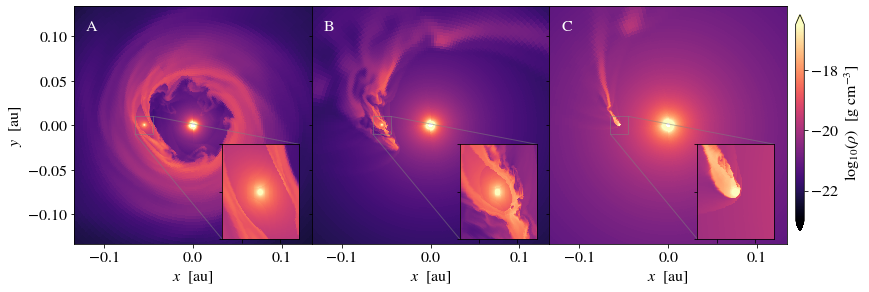

In [527]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5),sharey=True)
lim=2e12
mylevel = 3


base_dir_list = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/",
                 "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/",
                 "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/"]
snapshot = "PW_W107.out1.00030.athdf"

labellist = ['A','B','C']

for i in range(3):
    orb = pw.read_trackfile(base_dir_list[i]+"pm_trackfile.dat")
    dblank=pw.ar.athdf(base_dir_list[i]+snapshot,quantities=[],level=mylevel,subsample=True)
    x2sliceval = dblank['x2v'][np.argmin(np.abs(dblank['x2v']-np.pi/2) )]

    
    d = pw.read_data(base_dir_list[i]+snapshot,orb,
                 level=mylevel,x2_min=x2sliceval,x2_max=x2sliceval)

    
    
    
    
    im = ax[i].pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,
               pw.get_plot_array_midplane(d['y'][:,0,:])/c.au,
               pw.get_plot_array_midplane(np.log10(d['rho'][:,0,:]*SCALE)),
               cmap='magma',vmin=-23,vmax=-16.5,shading='flat',rasterized=True)


    #cb = plt.colorbar(im,aspect=30,pad=0.02,label=r'$\log_{10}\left(\rho \right) \ \ [{\rm g \ cm}^{-3}]$',shrink=0.9,extend='both')
    #cb.solids.set_edgecolor("face")

    ax[i].set_aspect('equal')
    ax[i].set_xlim(-lim/c.au,lim/c.au)
    ax[i].set_ylim(-lim/c.au,lim/c.au)


    axins = ax[i].inset_axes([0.57, 0.02, 0.43, 0.4])
    axins.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:])/c.au,
                 pw.get_plot_array_midplane(d['y'][:,0,:])/c.au,
                 pw.get_plot_array_midplane(np.log10(d['rho'][:,0,:]*SCALE)),
                 cmap='magma',vmin=-23,vmax=-16.5,shading='flat',rasterized=True)
    # sub region of the original image
    ilim = 1.5e11
    axins.set_aspect('equal')
    axins.set_xlim((-ilim-a)/c.au, (ilim-a)/c.au)
    axins.set_ylim(-ilim/c.au, ilim/c.au)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    ax[i].indicate_inset_zoom(axins)

    ax[i].annotate(labellist[i],(0.05,0.9),xycoords='axes fraction',color='w')
    
    ax[i].set_xlabel(r'$x \ \ [\rm {au}]$')
    ax[0].set_ylabel(r'$y \ \ [\rm {au}]$')
    
    
#ax[0].set_title(r'A')
#ax[1].set_title(r'B')
#ax[2].set_title(r'C')
fig.subplots_adjust(wspace=0.0,right=0.95)
cax = fig.add_axes([0.96, 0.21, 0.01, 0.6])
cb=fig.colorbar(im,cax=cax,label=r'$\log_{10}\left(\rho \right) \ \ [{\rm g \ cm}^{-3}]$',extend='both')
cb.solids.set_edgecolor("face")
plt.savefig("figures/density_slice_aniso_combined.pdf",bbox_inches='tight',dpi=300)

In [162]:
np.sqrt(6.67e-8*1.36e33/4.67e10/10) / 1.e7

1.3937148608988728

In [163]:
np.sqrt(6.67e-8*1.36e33/7e10/10) / 1.e7

1.1383697616704838

In [165]:
np.sqrt(6.67e-8*1.36e33/4.67e10/15) / 1.e7

1.1379634187120906

# RT Fig

In [16]:
def Voigt(x, alpha, gamma):
    sigma = alpha / np.sqrt(2.0*np.log(2.0))
    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2.0)))/sigma/np.sqrt(2.0*np.pi)

def make_rt_plot(mytitle):
    plt.figure(figsize=(6,10))


    plt.subplot(211)
    lim = 19
    im=plt.pcolormesh((d['x']+a)/rp,d['y']/rp, np.log10(d['nhe3']) ,shading='nearest',cmap = 'magma',
                      vmin=-8,vmax=3,
                      rasterized=True )
    plt.contour((d['x']+a)/rp,d['y']/rp,  np.log10(np.cumsum(d['nhe3']*sigma_he3*d['dr'],axis=1) ) ,
                cmap = 'Blues',levels=np.linspace(-3,0,4) )

    cb=plt.colorbar(im,label=r'$n_{\rm He} f_{3}$ [cm$^{-3}$]',shrink=0.9,extend='both')
    cb.solids.set_edgecolor("face")
    plt.axis('equal')
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.xticks(visible=False)
    #plt.xlabel('$x_p / r_p$')
    plt.ylabel('$y_p / r_p$')
    plt.title(mytitle)



    plt.subplot(212)
    im=plt.pcolormesh((d['x']+a)/rp,d['y']/rp, d['vx']/1.e5 ,shading='nearest',
                      cmap = 'Spectral',#'RdBu_r',
                      vmin=-30,vmax=30,rasterized=True )
    plt.contour((d['x']+a)/rp,d['y']/rp,  np.log10(np.cumsum(d['nhe3']*sigma_he3*d['dr'],axis=1) ) ,
                cmap = 'Blues',levels=np.linspace(-3,0,4) )

    cb=plt.colorbar(im,label=r'$v_{\rm los}$ [km s$^{-1}$]',shrink=0.9,extend='both')
    cb.solids.set_edgecolor("face")
    plt.axis('equal')
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    #plt.xticks(visible=False)
    plt.xlabel('$x_p / r_p$')
    plt.ylabel('$y_p / r_p$')

    plt.subplots_adjust(hspace=0)
    
    

<ipython-input-531-8f6aaed3d184>:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1=ax[0,i].pcolormesh((d['x']+a)/rp,d['y']/rp, np.log10(d['nhe3']) ,shading='nearest',cmap = 'magma',
<ipython-input-531-8f6aaed3d184>:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2=ax[1,i].pcolormesh((d['x']+a)/rp,d['y']/rp, d['vx']/1.e5 ,shading='nearest',cmap = 'RdBu_r',vmin=-40,vmax=40,rasterized=True )


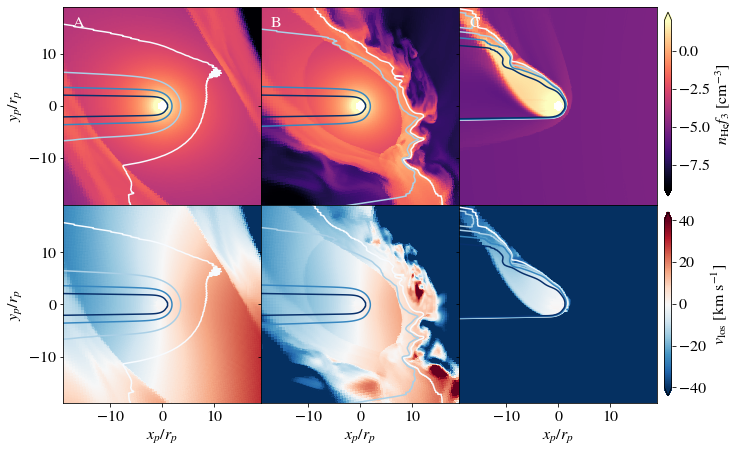

In [531]:
filelist = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf.rt.h5",
            "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf.rt.h5",
            "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/old/C00/PW_W107.out1.00030.athdf.rt.h5"]

fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(10,7.3),sharey=True,sharex=True)


for i in range(3):
    d = dd.io.load(filelist[i])
    d['rp'] = np.sqrt((d['x']+a)**2 + d['y']**2+d['z']**2)
    d['nhe3'] = np.where(d['rp']<rp,np.nan,d['nhe3'])
    da1 = np.sqrt(2.0*np.log(2.0))*nu1 * np.sqrt(0.25*c.kB*d['temp']/c.mp)/c.c
    sigma_he3 = (cs1+cs2)*Voigt(0,da1,natural_gamma) 
        
    lim = 19
    im1=ax[0,i].pcolormesh((d['x']+a)/rp,d['y']/rp, np.log10(d['nhe3']) ,shading='nearest',cmap = 'magma',
                      vmin=-9,vmax=2,
                      rasterized=True )
    ax[0,i].contour((d['x']+a)/rp,d['y']/rp,  np.nan_to_num(np.log10(np.cumsum(d['nhe3']*sigma_he3*d['dr'],axis=1) ),nan=100) ,
                cmap = 'Blues',levels=np.linspace(-3,0,4) )

    #cb=plt.colorbar(im,label=r'$n_{\rm He} f_{3}$ [cm$^{-3}$]',shrink=0.9,extend='both')
    #cb.solids.set_edgecolor("face")
    ax[0,i].set_aspect('equal')
    ax[0,i].set_xlim(-lim,lim)
    ax[0,i].set_ylim(-lim,lim)
    #ax[i].xticks(visible=False)
    #plt.xlabel('$x_p / r_p$')
    #ax[0,i].set_ylabel('$y_p / r_p$')
    #ax[i].title(mytitle)
    
    ax[0,i].annotate(labellist[i],(0.05,0.9),xycoords='axes fraction',color='w')



    im2=ax[1,i].pcolormesh((d['x']+a)/rp,d['y']/rp, d['vx']/1.e5 ,shading='nearest',cmap = 'RdBu_r',vmin=-40,vmax=40,rasterized=True )
    ax[1,i].contour((d['x']+a)/rp,d['y']/rp,  np.nan_to_num(np.log10(np.cumsum(d['nhe3']*sigma_he3*d['dr'],axis=1) ),nan=100), 
                cmap = 'Blues',levels=np.linspace(-3,0,4) )

    #cb=plt.colorbar(im,label=r'$v_{\rm los}$ [km s$^{-1}$]',shrink=0.9,extend='both')
    #cb.solids.set_edgecolor("face")
    ax[1,i].set_aspect('equal')
    ax[1,i].set_xlim(-lim,lim)
    ax[1,i].set_ylim(-lim,lim)
    #plt.xticks(visible=False)
    ax[1,i].set_xlabel('$x_p / r_p$')
    

ax[0,0].set_ylabel('$y_p / r_p$')
ax[1,0].set_ylabel('$y_p / r_p$')
fig.subplots_adjust(hspace=0.0,wspace=0.,right=0.95)
cax = fig.add_axes([0.96, 0.52, 0.01, 0.35])
cb=fig.colorbar(im1,cax=cax,label=r'$n_{\rm He} f_{3}$ [cm$^{-3}$]',extend='both')
cb.solids.set_edgecolor("face")
cax = fig.add_axes([0.96, 0.14, 0.01, 0.35])
cb=fig.colorbar(im2,cax=cax,label=r'$v_{\rm los}$ [km s$^{-1}$]',extend='both')
cb.solids.set_edgecolor("face")

#ax[0,0].set_title(r'$\dot M_* = 10^{11}$ g s$^{-1}$')
#ax[0,1].set_title(r'$\dot M_* = 10^{12}$ g s$^{-1}$')
#ax[0,2].set_title(r'$\dot M_* = 10^{13}$ g s$^{-1}$')



plt.savefig("figures/rt_combined.pdf",bbox_inches='tight',dpi=300)

# Spectra 

137.3175098663633
[-6.6 -4.4 -2.2 -1.1  0.   1.1  2.2  4.4  6.6]
['+6.6', '+4.4', '+2.2', '+1.1', ' 0.0', '-1.1', '-2.2', '-4.4', '-6.6']


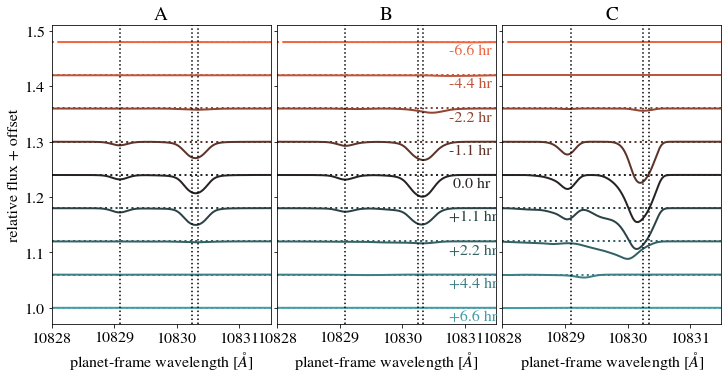

In [542]:
Phr = 2*np.pi*np.sqrt(orb['sep'][0]**3 / (6.67e-8*orb['m1'][0])) / 3600.
print(Phr)

filelistA = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.3.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.2.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.1.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.05.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.0.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.05.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.1.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.2.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.3.txt"]

filelistB = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.3.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.2.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.1.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.05.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.0.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.05.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.1.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.2.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.3.txt"]

filelistC = ["/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.3.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.2.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.1.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a-0.05.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.0.txt",
             "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.05.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.1.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.2.txt",
              "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a0.3.txt"]



def plot_list_planetframe(filelist,pal,alist,offset=0.0):
    vorb = np.sqrt( (6.67e-8*orb['m1'][0])/orb['sep'][0] )
    vplanet = np.sin(np.array(alist))*vorb
    for i,fn in enumerate(filelist):
        sp = ascii.read(fn,names=['lambda','flux'])
        plt.axhline(1+offset*i,color=pal[i],lw=2,ls=':',zorder=0)
        plt.plot(sp['lambda']*(1+vplanet[i]/c.c),sp['flux']+offset*i,label=labellist[i],color=pal[i],lw=2)

    aa = np.linspace(-0.3,0.3,1000)
    
    plt.axvline(10830.33977, color='black', ls=':')
    plt.axvline(10830.2501, color='black', ls=':')
    plt.axvline(10829.09114, color='black', ls=':')
    plt.xlabel(r'planet-frame wavelength [$\AA$]')
    plt.xlim(10828,10831.5)


pal = sns.diverging_palette(200,20,n=len(filelist10),l=60,s=80,center='dark')


alist = np.array([-0.3,-0.2,-0.1,-0.05,0,0.05,0.1,0.2,0.3])
labellist = np.round(alist/(2*np.pi)*Phr,1)
print( labellist)
labellist = [ "+6.6","+4.4","+2.2","+1.1"," 0.0","-1.1","-2.2","-4.4","-6.6"]
print( labellist)


myoff = 0.06
top = 1+myoff*(len(filelistA)-1)+0.03
plt.figure(figsize=(12,5.5))
plt.subplot(131)
plt.title(r'A')
plot_list_planetframe(filelistA,pal,alist,offset=myoff)
plt.ylabel('relative flux + offset')
plt.ylim(0.97,top)

plt.subplot(132)
plt.title(r'B')
plot_list_planetframe(filelistB,pal,alist,offset=myoff)
plt.yticks(visible=False)
plt.ylabel(None)
plt.ylim(0.97,top)

for i,lab in enumerate(labellist):
    plt.annotate(str(lab)+" hr",(10830.75,0.978 + myoff*i),color=pal[i])
    #plt.annotate(str(lab),(10827.6,0.95 + myoff*i),color=pal[i])


plt.subplot(133)
plt.title(r'C')
plot_list_planetframe(filelistC,pal,alist,offset=myoff)
plt.yticks(visible=False)
plt.ylabel(None)
plt.ylim(0.97,top)



plt.subplots_adjust(wspace=0.03)
plt.savefig("figures/spectra_angle_series_combined.pdf",bbox_inches='tight',dpi=300)

<ipython-input-568-36bc4e44c115>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(xx,yy,(1-zz)*100,cmap=mycm,vmin=0,vmax=1,rasterized=True)
<ipython-input-568-36bc4e44c115>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(xx,yy,(1-zz)*100,cmap=mycm,vmin=0,vmax=1,rasterized=True)
<ipython-input-568-36bc4e44c115>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated s

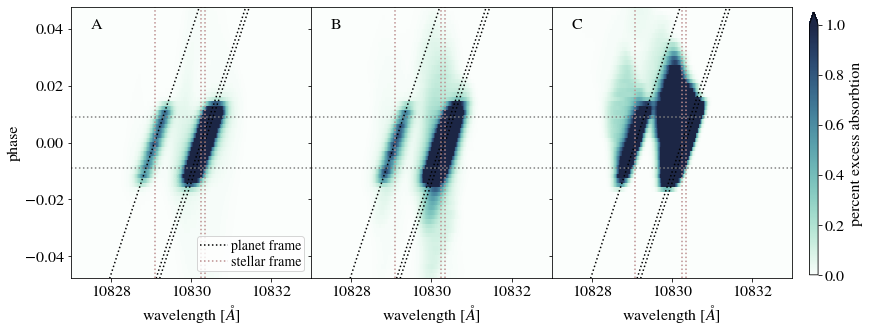

In [568]:
# colormap series
def make_filelist(filestem):
    angles = np.linspace(-0.3,0.3,61)
    filelist = []
    for i,aa in enumerate(angles):
        fn = filestem + str(np.round(aa,2)) + ".txt"
        filelist.append(fn)
    return filelist

def plot_absorbtion_phase(filestem):
    mycm = sns.cubehelix_palette(1024,start=3,light=0.99,hue=1,rot=-0.3,as_cmap=True)
    filelist = make_filelist(filestem)
    sp = ascii.read(filelist[0],names=['lambda','flux'])
    x = sp['lambda']
    y = -np.linspace(-0.3,0.3,61)/(2*np.pi)
    xx,yy = np.meshgrid(x,y)
    zz = np.zeros_like(xx)

    for i,fn in enumerate(filelist):
        sp = ascii.read(fn,names=['lambda','flux'])
        zz[i,:] = sp['flux']
    im = plt.pcolormesh(xx,yy,(1-zz)*100,cmap=mycm,vmin=0,vmax=1,rasterized=True)
    #im = plt.pcolormesh(xx,yy,np.log10(1-zz),cmap=mycm,vmin=-5,vmax=0,rasterized=True)
    #plt.plot(10830.33977, color='black', ls=':')
    al = np.linspace(-0.3,0.3,1000)
    vorb = np.sqrt( (6.67e-8*orb['m1'][0])/orb['sep'][0] )
    vplanet = np.sin(al)*vorb
    plt.plot(10830.33977*(1+vplanet/c.c),al/(2*np.pi), color='black', ls=':',label='planet frame')
    plt.plot(10830.2501*(1+vplanet/c.c),al/(2*np.pi), color='black', ls=':')
    plt.plot(10829.09114*(1+vplanet/c.c),al/(2*np.pi), color='black', ls=':')
    plt.axvline(10830.33977, color='RosyBrown', ls=':',label='stellar frame')
    plt.axvline(10830.2501, color='RosyBrown', ls=':')
    plt.axvline(10829.09114, color='RosyBrown', ls=':')
    plt.axhline(4.67e10/orb['sep'][0]/(2*np.pi),ls=':',color='grey')  
    plt.axhline(-4.67e10/orb['sep'][0]/(2*np.pi),ls=':',color='grey')  
    return im

fig=plt.figure(figsize=(12,5))
plt.subplot(131)
stemA = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a"
imA = plot_absorbtion_phase(stemA)
#plt.colorbar()
plt.ylabel('phase')
plt.xlabel(r'wavelength [$\AA$]')
plt.annotate('A',(10827.5,0.04))
plt.legend(frameon=True,loc='lower right')

plt.subplot(132)
stemB = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a"
imB = plot_absorbtion_phase(stemB)
plt.yticks(visible=False)
plt.xlabel(r'wavelength [$\AA$]')
plt.annotate('B',(10827.5,0.04))

plt.subplot(133)
stemC = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_a"
imC = plot_absorbtion_phase(stemC)
plt.yticks(visible=False)
plt.xlabel(r'wavelength [$\AA$]')
plt.annotate('C',(10827.5,0.04))

plt.subplots_adjust(wspace=0,right=0.96)
cax = fig.add_axes([0.98, 0.135, 0.01, 0.73])
cb=fig.colorbar(imC,cax=cax,label=r'percent excess absorbtion',extend='max')
cb.solids.set_edgecolor("face")


plt.savefig("figures/absorbtion_colormap_1.pdf",bbox_inches='tight',dpi=300)

# Light Curves from Spectra (EW)

In [110]:
#pal = sns.cubehelix_palette(n_colors=3,start=2.2,rot=0.8,hue=1,light=0.7)

sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [573]:
def get_EW(fn):
    sp = ascii.read(fn,names=['lambda','flux'])
    dlam = sp['lambda'][1]-sp['lambda'][0]
    return np.sum(1-sp['flux'])*dlam


def write_EWT(mydir,fileroot,alist):
    ew = np.zeros_like(alist)
    for i,aa in enumerate(alist):
        fn = mydir+fileroot+"_a"+str(np.round(aa,2))+".txt"
        ew[i]=get_EW(fn)

    from astropy.table import Table
    ewt = Table([np.round(alist,2),ew],names=['angle','EW'])
    ewt['phase'] = -ewt['angle']/(2*np.pi)
    ascii.write(ewt,mydir+fileroot+"_EWT.dat",overwrite=True)
    

In [583]:
mydir = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/"
fileroot = "PW_W107.out1.00026.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23"
alist = np.linspace(-0.3,0.3,61)
write_EWT(mydir,fileroot,alist)

mydir = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/"
write_EWT(mydir,fileroot,alist)

mydir = "/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/"
write_EWT(mydir,fileroot,alist)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude              mean               stddev      
    ------------------- -------------------- ------------------
    0.01822061866988343 0.021099780793497096 1.2976082947703649
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude               mean               stddev      
    -------------------- -------------------- ------------------
    0.022277900138133237 -0.08467817750679149 1.4008842091383464
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             mean              stddev      
    ------------------- ------------------ ------------------
    0.05697783397309735 0.5226793586514351 1.4247055323554076


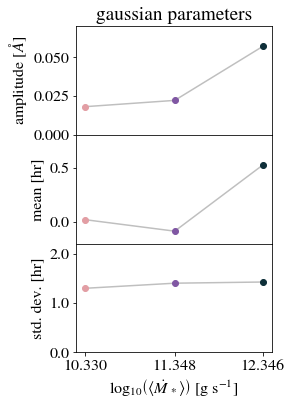

In [611]:
lmds=np.log10(np.array([21373162351.52165,222856131298.10583,2220454836527.928]))

ewtAa = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00026.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtAb = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00027.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtAc = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00028.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtAd = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00029.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtAe = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")

ewtBa = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00026.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtBb = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00027.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtBc = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00028.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtBd = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00029.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtBe = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")

ewtCa = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00026.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtCb = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00027.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtCc = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00028.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtCd = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00029.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")
ewtCe = ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.out1.00030.athdf_s0.25_l5_Nmc3000_Nr200_spectrum23_EWT.dat")




from astropy.modeling import models, fitting
import scipy.stats


# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.1, mean=0, stddev=1.6)
fit_g = fitting.LevMarLSQFitter()
gA = fit_g(g_init, ewtAa['phase']*Phr, (ewtAa['EW']+ewtAb['EW']+ewtAc['EW']+ewtAd['EW']+ewtAe['EW'])/5. )
print(gA)

gB = fit_g(g_init, ewtBa['phase']*Phr, (ewtBa['EW']+ewtBb['EW']+ewtBc['EW']+ewtBd['EW']+ewtBe['EW'])/5. )
print(gB)

gC = fit_g(g_init, ewtCa['phase']*Phr, (ewtCa['EW']+ewtCb['EW']+ewtCc['EW']+ewtCd['EW']+ewtCe['EW'])/5. )
print(gC)


lmd = [11,12,13]
amp = [gA.amplitude.value,gB.amplitude.value,gC.amplitude.value]
mean = [gA.mean.value,gB.mean.value,gC.mean.value]
stddev = [gA.stddev.value,gB.stddev.value,gC.stddev.value]






#pal = sns.cubehelix_palette(n_colors=3,start=1.3,rot=2,hue=1,light=0.6)
pal = sns.cubehelix_palette(n_colors=3,start=2.2,rot=0.8,hue=1,light=0.7)

plt.figure(figsize=(3.5,6))

plt.subplot(311)
plt.title("gaussian parameters")
plt.plot(lmds,amp,'-',color='grey',alpha=0.5)
for i in range(3):
    plt.plot(lmds[i],amp[i],'o',color=pal[i])

plt.xticks(visible=False)
plt.ylim(0,0.07)
#plt.grid()
plt.ylabel(r"amplitude [$\AA$]")

plt.subplot(312)
plt.plot(lmds,mean,'-',color='grey',alpha=0.5)
for i in range(3):
    plt.plot(lmds[i],mean[i],'o',color=pal[i])
    
plt.xticks(visible=False)
plt.ylim(-0.2,0.8)
#plt.grid()
plt.ylabel(r"mean [hr]")

plt.subplot(313)
plt.plot(lmds,stddev,'-',color='grey',alpha=0.5)
for i in range(3):
    plt.plot(lmds[i],stddev[i],'o',color=pal[i])
    
plt.ylim(0,2.2)
#plt.grid()
plt.ylabel(r"std. dev. [hr]")
plt.xticks(lmds)
plt.xlabel(r"$\log_{10}\left( \langle\dot M_*\rangle \right)$ [g s$^{-1}$]")
plt.yticks([0.0,1.0,2.0],labels=[0.0,1.0,2.0])

plt.subplots_adjust(hspace=0)


plt.savefig("figures/gauss_param.pdf",bbox_inches='tight',dpi=300)

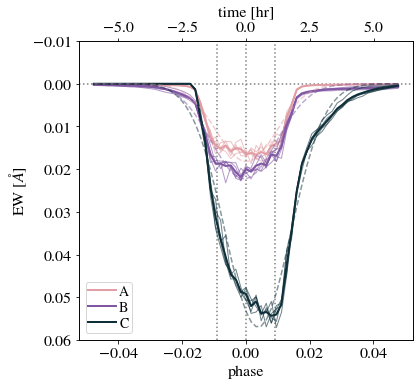

In [591]:
plt.figure(figsize=(6,5.5))
plt.ylim(0.06,-0.01)
plt.axhline(0,ls=':',color='grey')
plt.axvline(0,ls=':',color='grey')
plt.axvline(4.67e10/orb['sep'][0]/(2*np.pi),ls=':',color='grey')  
plt.axvline(-4.67e10/orb['sep'][0]/(2*np.pi),ls=':',color='grey')
plt.ylabel(r"EW [$\AA$]")
plt.xlabel("phase")




alpha = 0.6

plt.plot(ewtAa['phase'],(ewtAa['EW']+ewtAb['EW']+ewtAc['EW']+ewtAd['EW']+ewtAe['EW'])/5.,color=pal[0],label=r'A',lw=2)
plt.plot(ewtAa['phase'],ewtAa['EW'],color=pal[0],label='',lw=1,alpha=alpha)
plt.plot(ewtAb['phase'],ewtAb['EW'],color=pal[0],label='',lw=1,alpha=alpha)
plt.plot(ewtAc['phase'],ewtAc['EW'],color=pal[0],label='',lw=1,alpha=alpha)
plt.plot(ewtAd['phase'],ewtAd['EW'],color=pal[0],label='',lw=1,alpha=alpha)
plt.plot(ewtAe['phase'],ewtAe['EW'],color=pal[0],label='',lw=1,alpha=alpha)

plt.plot(ewtBa['phase'],(ewtBa['EW']+ewtBb['EW']+ewtBc['EW']+ewtBd['EW']+ewtBe['EW'])/5.,color=pal[1],label=r'B',lw=2)
plt.plot(ewtBa['phase'],ewtBa['EW'],color=pal[1],label='',lw=1,alpha=alpha)
plt.plot(ewtBb['phase'],ewtBb['EW'],color=pal[1],label='',lw=1,alpha=alpha)
plt.plot(ewtBc['phase'],ewtBc['EW'],color=pal[1],label='',lw=1,alpha=alpha)
plt.plot(ewtBd['phase'],ewtBd['EW'],color=pal[1],label='',lw=1,alpha=alpha)
plt.plot(ewtBe['phase'],ewtBe['EW'],color=pal[1],label='',lw=1,alpha=alpha)

plt.plot(ewtCa['phase'],(ewtCa['EW']+ewtCb['EW']+ewtCc['EW']+ewtCd['EW']+ewtCe['EW'])/5.,color=pal[2],label=r'C',lw=2)
plt.plot(ewtCa['phase'],ewtCa['EW'],color=pal[2],label='',lw=1,alpha=alpha)
plt.plot(ewtCb['phase'],ewtCb['EW'],color=pal[2],label='',lw=1,alpha=alpha)
plt.plot(ewtCc['phase'],ewtCc['EW'],color=pal[2],label='',lw=1,alpha=alpha)
plt.plot(ewtCd['phase'],ewtCd['EW'],color=pal[2],label='',lw=1,alpha=alpha)
plt.plot(ewtCe['phase'],ewtCe['EW'],color=pal[2],label='',lw=1,alpha=alpha)



xp = ewtBe['phase']
plt.plot(xp,gA(xp*Phr),color=pal[0],ls='--',alpha=0.5)
plt.plot(xp,gB(xp*Phr),color=pal[1],ls='--',alpha=0.5)
plt.plot(xp,gC(xp*Phr),color=pal[2],ls='--',alpha=0.5)

plt.legend(loc=0,frameon=True)

par = plt.twiny()
par.set_xlim(np.min(ewtAa['phase'])*Phr,np.max(ewtAa['phase'])*Phr)
par.set_xlabel('time [hr]')

plt.savefig("figures/EW_LC.pdf",bbox_inches='tight',dpi=300)

In [595]:
def print_stats(hst):
    hst['MdotP'] = np.gradient(hst['0-scalar'])/np.gradient(hst['time'])-hst['md_m_p']
    hst['MdotS'] = np.gradient(hst['1-scalar'])/np.gradient(hst['time'])-hst['md_m_s']
    
    sel = hst['time']>1.e6
    #plt.plot(hst['time'][sel],hst['MdotS'][sel])
    print("mdot_p (mean) =",np.mean(hst['MdotP'][sel])*SCALE)
    print("mdot_s (mean) =",np.mean(hst['MdotS'][sel])*SCALE)
    print("\n")

print("A")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)

print("A3")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A3/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)

print("A4")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A4/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)

print("A6")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/A/A6/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)

print("B")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/B/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)

print("C")
hst=ascii.read("/Users/morganmacleod/DATA/athenaruns/w107_sw_paper/C/PW_W107.hst",
          names=['time','dt','mass','1-mom','2-mom','3-mom','1-KE','2-KE','3-KE','tot-E','0-scalar','1-scalar','md_m_p','md_m_s'])
print_stats(hst)



A
mdot_p (mean) = 11379838325.585957
mdot_s (mean) = 21373162351.52165


A3
mdot_p (mean) = 11633310362.43273
mdot_s (mean) = 20974627145.299587


A4
mdot_p (mean) = 12026834166.520912
mdot_s (mean) = 21108707392.667316


A6
mdot_p (mean) = 11472426429.911182
mdot_s (mean) = 21368860966.51798


B
mdot_p (mean) = 10873834284.200666
mdot_s (mean) = 222856131298.10583


C
mdot_p (mean) = 9057545451.889603
mdot_s (mean) = 2220454836527.928




<ipython-input-595-c0e46d576e2b>:2: RuntimeWarning: invalid value encountered in true_divide
  hst['MdotP'] = np.gradient(hst['0-scalar'])/np.gradient(hst['time'])-hst['md_m_p']
<ipython-input-595-c0e46d576e2b>:3: RuntimeWarning: invalid value encountered in true_divide
  hst['MdotS'] = np.gradient(hst['1-scalar'])/np.gradient(hst['time'])-hst['md_m_s']


array([10.32986878, 11.34802459, 12.34644194])

In [374]:
4.67e10/orb['sep'][0]/(2*np.pi)

0.009009134354413955

# momentum ratios 

In [596]:
rhos = 4.16e-15
Ms = 1.36e33
Rs = 4.67e10
Lamdas = 15

rhop = 7.78e-16
Mp = 1.82e29
Rp = 6.71e9
Lamdap = 5

momratioA = (rhop/rhos)*(Mp/Ms)*(Rs/Rp)*(Lamdas/Lamdap)*np.exp(Lamdas-Lamdap)
print("A:",momratioA)

rhos = 4.16e-14
momratioB = (rhop/rhos)*(Mp/Ms)*(Rs/Rp)*(Lamdas/Lamdap)*np.exp(Lamdas-Lamdap)
print("B:",momratioB)

rhos = 4.16e-14
rhop = 1.46299e-15
momratioC = (rhop/rhos)*(Mp/Ms)*(Rs/Rp)*(Lamdas/Lamdap)*np.exp(Lamdas-Lamdap)
print("C:",momratioC)

A: 11.510102208254997
B: 1.1510102208254995
C: 2.164417021806552


In [379]:
np.sqrt((5*Rp)**3/(6.67e-8*Mp))/3600

1.3857429204810596

In [597]:
4.16/4

1.04

In [598]:
5.39/4

1.3475

In [599]:
7.78/4

1.945

In [600]:
1.46/4

0.365

In [601]:
2.82/4

0.705

In [602]:
0.000529618/4

0.0001324045